*Machine Learning Project ! *
Eliya Zaguri 207313131
Adar Saban 313174120

In [118]:
# שלב 1: טעינת נתונים
import pandas as pd

# טען את הקובץ (החלף את הנתיב בשם הקובץ שלך)
file_path = "C:\\Users\\eliya\\OneDrive\\שולחן העבודה\\למידת מכונה\\7f467a30-58cd-44b5-86f0-d570cc7d25ad (1).csv"

# קריאת הנתונים לתוך DataFrame
try:
    data = pd.read_csv(file_path, encoding='utf-8')  # נסה עם קידוד UTF-8
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='windows-1255')  # נסה עם קידוד עברי

# הצגת חמש השורות הראשונות כדי להכיר את מבנה הנתונים
data.head()

# מידע על הנתונים (סוגי עמודות, ערכים חסרים וכו')
#data.info()

# בדיקת נתונים סטטיסטיים כלליים
#data.describe()

# תיעוד
# - טענו את הנתונים בהצלחה.
# - מטרת הבדיקה הראשונית היא להבין את מבנה הנתונים, סוגי העמודות, והאם יש ערכים חסרים שדורשים טיפול.


,project_id,building_id,designation_id,project_halted,project_general_last_update,building_count,designation_count,gush,helka,X,...,certificate_insert_date_a,certificate_score_a,certificate_stars_a,certificate_energy_a,certificate_date_b,certificate_insert_date_b,certificate_score_b,certificate_stars_b,certificate_energy_b,designation_info_status
0,2,2,2.0,הבדיקה בוצעה,26/10/2023,1.0,1.0,7932,505/449,186427.276429,...,18/10/2023,65.5,2.0,B,NaN,NaN,NaN,NaN,NaN,לא סופי
1,52,50,46.0,הבדיקה בוצעה,26/10/2023,1.0,1.0,6580,173,187783.292821,...,16/10/2023,57.5,1.0,B,NaN,NaN,NaN,NaN,NaN,לא סופי
2,66,63,59.0,הבדיקה בוצעה,16/07/2023,1.0,1.0,7057,33,177558.778853,...,NaN,NaN,NaN,NaN,11/12/2017,12/09/2023,55.0,1.0,A,לא סופי
3,73,70,66.0,הבדיקה בוצעה,28/12/2023,1.0,1.0,8996,4,176435.084857,...,NaN,NaN,NaN,NaN,14/11/2017,12/09/2023,55.0,1.0,A,לא סופי
4,81,78,74.0,הבדיקה בוצעה,27/12/2023,1.0,1.0,6212,191,180234.564294,...,NaN,NaN,NaN,NaN,20/04/2017,12/09/2023,55.0,1.0,A,לא סופי


In [119]:
print(len(data))
# 1. בדיקת ערכים חסרים
print("\nכמות הערכים החסרים בכל עמודה:")
print(data.isnull().sum())



# 3. הצגת ערכים ייחודיים לדוגמה
print("\nערכים ייחודיים לדוגמה עבור עמודות מפתח:")
for column in ['certificate_energy_a', 'designation_info_status']:  # ניתן להוסיף עמודות אחרות
    print(f"{column}: {data[column].unique()}")


4862

כמות הערכים החסרים בכל עמודה:
project_id                          0
building_id                         0
designation_id                      1
project_halted                      1
project_general_last_update         1
building_count                     15
designation_count                  15
gush                               97
helka                             142
X                                 291
Y                                 291
municipality_id                    11
municipality_name                  11
building_info_last_update          15
building_street                   520
building_address_number          1689
building_address_entrance        4862
building_migrash                 2608
floors_above_ground                 2
building_area                      60
standard_name_id                    1
standard_name                       1
standard_designation_id             1
standard_designation_name          15
standard_designation_main_use      15
main_use_name 

In [102]:
data['certificate_energy_pre'].unique()

array([nan, 'C', 'B', 'A', 'A+'], dtype=object)

In [103]:
data['municipality_name'].unique()

array(['נתניה', 'רעננה', 'תל אביב - יפו', 'הרצליה', 'בת ים', 'רחובות',
       'פתח תקווה', 'אופקים', 'נס ציונה', 'חיפה', 'רמת השרון', 'באר שבע',
       'מעלה אדומים', 'קרית אונו', 'רמת גן', 'ירושלים', 'אשקלון', 'חולון',
       'דימונה', 'כפר סבא', 'חדרה', 'נשר', 'אשדוד', 'באר יעקב', 'שוהם',
       'הוד השרון', 'ראשון לציון', 'גבעתיים', 'בית שמש', 'יבנה', 'נהריה',
       'קרית אתא', nan, 'אזור', 'כפר יונה', 'מזכרת בתיה', 'בני ברק',
       'דרום השרון', 'גזר', 'ראש העין', 'מגדל העמק', 'אריאל',
       'קרית ביאליק', 'יקנעם עילית', 'טירת כרמל', 'פרדס חנה-כרכור', 'לוד',
       'קרית גת', 'אשכול', 'רהט', 'בני שמעון', 'גבעת שמואל', 'חריש',
       'כרמיאל', 'עמק יזרעאל', 'רכסים', "מג'ד אל-כרום", 'כפר מנדא',
       'משגב', 'חוף הכרמל', 'טבריה', 'קצרין', 'אילת', 'נתיבות', 'רמת נגב',
       'קרית טבעון', 'חבל יבנה', 'יסוד המעלה', 'מטה אשר', 'אום אל-פחם',
       'עראבה', 'מעלה יוסף', 'סביון*', 'חבל אילות', 'אור עקיבא',
       'כוכב יאיר', 'שדרות', 'עכו', 'אור יהודה', 'רמלה', 'מודיעין עילית',
     

In [104]:
data['residential_units'].unique()

array([ 3.00e+02,  8.00e+00,  0.00e+00,  1.28e+02,  2.30e+01,  3.60e+01,
        3.10e+01,  1.20e+01,  2.00e+01,  1.60e+01,  4.10e+01,  1.25e+02,
        1.24e+02,  1.19e+02,  7.60e+01,  2.70e+01,  1.30e+01,  1.70e+01,
        2.80e+01,  3.40e+01,  1.00e+01,  4.50e+01,  2.50e+01,  2.70e+02,
        1.40e+01,  4.40e+01,  2.90e+01,  2.10e+01,  3.90e+01,  4.00e+01,
        5.20e+01,  6.00e+01,  1.90e+01,  3.00e+01,  1.50e+01,  7.00e+00,
        6.50e+01,  2.40e+01,  2.20e+01,  4.20e+01,  1.80e+01,  1.10e+01,
        1.33e+02,  1.06e+02,  2.60e+01,  3.20e+01,  6.00e+00,  1.23e+02,
        1.41e+02,  7.40e+01,  3.70e+01,  9.00e+00,  5.00e+00,  8.90e+01,
        6.90e+01,  7.10e+01,  7.20e+01,  4.90e+01,  6.40e+01,  7.90e+01,
        7.80e+01,  2.17e+02,  9.80e+01,  3.30e+01,  1.80e+02,  3.80e+01,
        5.60e+01,  9.50e+01,  4.30e+01,  2.04e+02,  3.50e+01,  9.00e+01,
        1.20e+02,  8.20e+01,  7.30e+01,  1.72e+02,  1.48e+02,  4.33e+02,
        1.21e+02,  1.32e+02,  8.10e+01,  4.50e+02, 

In [120]:
# חישוב אחוז הערכים החסרים בכל עמודה
missing_percent = data.isnull().mean() * 100
print("\nאחוז הערכים החסרים בכל עמודה:")
print(missing_percent)

# סף להסרה: 70%
threshold = 70

# שמירת עמודות עם פחות מ-70% ערכים חסרים
columns_to_keep = missing_percent[missing_percent < threshold].index
data = data[columns_to_keep]

print("\nעמודות שנשמרו לאחר הסרת עמודות עם מעל 70% ערכים חסרים:")
print(data.columns)

# בדיקה מחודשת של ערכים חסרים
print("\nכמות הערכים החסרים לאחר הסרת עמודות:")
print(data.isnull().sum())



אחוז הערכים החסרים בכל עמודה:
project_id                         0.000000
building_id                        0.000000
designation_id                     0.020568
project_halted                     0.020568
project_general_last_update        0.020568
building_count                     0.308515
designation_count                  0.308515
gush                               1.995064
helka                              2.920609
X                                  5.985191
Y                                  5.985191
municipality_id                    0.226244
municipality_name                  0.226244
building_info_last_update          0.308515
building_street                   10.695187
building_address_number           34.738791
building_address_entrance        100.000000
building_migrash                  53.640477
floors_above_ground                0.041135
building_area                      1.234060
standard_name_id                   0.020568
standard_name                      0.020568
s

In [121]:
# Filling missing values based on column significance and type

# 1. Categorical columns: Fill with mode
categorical_columns = ['project_halted', 'designation_info_status']
for col in categorical_columns:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

# 2. Numeric columns with quantitative significance: Fill with median
numeric_columns = ['building_count', 'designation_count', 'building_area', 'residential_units']
for col in numeric_columns:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)

# 3. Geographical data (X, Y): Leave as NaN for potential clustering or special handling
# Optional: Fill based on mean/median of nearby `gush` or `helka` values if available

# 4. Columns with unclear or non-critical significance: Fill with "לא ידוע"
non_critical_columns = ['building_migrash']
for col in non_critical_columns:
    if col in data.columns:
        data[col].fillna('לא ידוע', inplace=True)

# Verify the remaining missing values
remaining_missing_values = data.isnull().sum()

# Display the updated summary of missing values
print("\nRemaining Missing Values After Treatment:")
print(remaining_missing_values)



Remaining Missing Values After Treatment:
project_id                          0
building_id                         0
designation_id                      1
project_halted                      0
project_general_last_update         1
building_count                      0
designation_count                   0
gush                               97
helka                             142
X                                 291
Y                                 291
municipality_id                    11
municipality_name                  11
building_info_last_update          15
building_street                   520
building_address_number          1689
building_migrash                    0
floors_above_ground                 2
building_area                       0
standard_name_id                    1
standard_name                       1
standard_designation_id             1
standard_designation_name          15
standard_designation_main_use      15
main_use_name                       1
route  

In [122]:
# Filling missing values in columns with few missing values (≤ 15)
columns_few_missing = [
    'designation_id', 'project_general_last_update', 'municipality_id', 
    'municipality_name', 'floors_above_ground','building_info_last_update', 'standard_name_id', 
    'standard_name', 'standard_designation_id', 'standard_designation_name', 
    'standard_designation_main_use', 'main_use_name', 'route', 
    'designation_info_last_update', 'certification_status'
]

# Filling with mode for categorical and median for numeric columns
for col in columns_few_missing:
    if col in data.columns:
        if data[col].dtype == 'object':  # Categorical column
            data[col].fillna(data[col].mode()[0], inplace=True)
        else:  # Numeric column
            data[col].fillna(data[col].median(), inplace=True)

# Verify remaining missing values
remaining_missing_values = data.isnull().sum()

# Display updated missing values
print("\nRemaining Missing Values After Filling Few Missing:")
print(remaining_missing_values)



Remaining Missing Values After Filling Few Missing:
project_id                          0
building_id                         0
designation_id                      0
project_halted                      0
project_general_last_update         0
building_count                      0
designation_count                   0
gush                               97
helka                             142
X                                 291
Y                                 291
municipality_id                     0
municipality_name                   0
building_info_last_update           0
building_street                   520
building_address_number          1689
building_migrash                    0
floors_above_ground                 0
building_area                       0
standard_name_id                    0
standard_name                       0
standard_designation_id             0
standard_designation_name           0
standard_designation_main_use       0
main_use_name                      

In [123]:
# For `gush` and `helka`: Fill missing values with "לא ידוע"
columns_to_fill_unknown = ['gush', 'helka']

for col in columns_to_fill_unknown:
    if col in data.columns:
        data[col].fillna('לא ידוע', inplace=True)

# Verify the updated missing values for `gush` and `helka`
remaining_missing_values_gush_helka = data[columns_to_fill_unknown].isnull().sum()

# Display the updated summary for `gush` and `helka`
print("\nRemaining Missing Values for `gush` and `helka` (After Filling with 'לא ידוע'):")
print(remaining_missing_values_gush_helka)



Remaining Missing Values for `gush` and `helka` (After Filling with 'לא ידוע'):
gush     0
helka    0
dtype: int64


In [124]:
import pandas as pd

# Engineering new features

# 1. Convert dates to numerical values (e.g., days since a specific date)
if 'project_general_last_update' in data.columns:
    data['project_days_since_update'] = pd.to_datetime(data['project_general_last_update'], errors='coerce').apply(
        lambda x: (pd.Timestamp.now() - x).days if pd.notnull(x) else None
    )

# 2. Calculate density (building area per residential unit)
if 'building_area' in data.columns and 'residential_units' in data.columns:
    data['density'] = data.apply(
        lambda row: row['building_area'] / row['residential_units']
        if row['residential_units'] > 0 else None, axis=1
    )

# 4. Optional: Combine X and Y to create a synthetic feature for distance (if needed in the future)
# Placeholder for potential geographic feature engineering

# Display the newly engineered features for review
print("\nEngineered Features:")
print(data[['project_days_since_update', 'density']].head())



Engineered Features:
   project_days_since_update     density
0                        442  109.656667
1                        442  175.000000
2                        544         NaN
3                        379         NaN
4                        380         NaN


In [125]:
# רשימות של ערים לפי אזורים
north = [
    'חיפה', 'נהריה', 'קרית אתא', 'מגדל העמק', 'יקנעם עילית', 'טירת כרמל',
    'כרמיאל', 'עמק יזרעאל', 'רכסים', "מג'ד אל-כרום", 'כפר מנדא', 'משגב',
    'חוף הכרמל', 'טבריה', 'קצרין', 'קרית טבעון', 'יסוד המעלה', 'מטה אשר',
    'אום אל-פחם', 'עראבה', 'מעלה יוסף', 'עכו', 'שפרעם', "סח'נין", 'נצרת',
    'נוף הגליל', 'צפת', 'מעגן מיכאל', 'עפולה', 'יקנעם (מושבה)', 'דבוריה',
    'כפר קרע', 'כפר גלעדי'
]

center = [
    'נתניה', 'רעננה', 'תל אביב - יפו', 'הרצליה', 'בת ים', 'רחובות', 
    'פתח תקווה', 'נס ציונה', 'רמת השרון', 'קרית אונו', 'רמת גן', 'כפר סבא', 
    'חדרה', 'שוהם', 'הוד השרון', 'ראשון לציון', 'גבעתיים', 'יבנה', 'אזור',
    'כפר יונה', 'מזכרת בתיה', 'בני ברק', 'דרום השרון', 'גזר', 'ראש העין', 
    'אריאל', 'פרדס חנה-כרכור', 'גבעת שמואל', 'חריש', 'כוכב יאיר', 'אור עקיבא',
    'סביון*', 'אור יהודה', 'רמלה', 'גן יבנה', 'יהוד-מונוסון', 'מודיעין-מכבים-רעות',
    'אלעד', 'יקום', 'נווה ימין', 'מטה יהודה', 'קרית עקרון', 'בן שמן (כפר נוער)',
    'גן שמואל', 'טייבה', 'ערערה', 'רמת הכובש'
]

south = [
    'אופקים', 'באר שבע', 'אשקלון', 'דימונה', 'אשדוד', 'באר יעקב', 'מעלה אדומים',
    'קרית גת', 'אשכול', 'רהט', 'בני שמעון', 'שדרות', 'אילת', 'נתיבות',
    'רמת נגב', 'חבל יבנה', 'חבל אילות', 'ערד', 'ספיר', 'מצפה רמון'
]

unknown = ['none']  # ערכים שאינם מזוהים או חסרים

# פונקציה למיפוי עיר לאזור
def assign_region(city):
    if city in north:
        return 'north'
    elif city in center:
        return 'center'
    elif city in south:
        return 'south'
    else:
        return 'unknown'

# יצירת עמודה חדשה "region" על בסיס הערכים ב-municipality_name
if 'municipality_name' in data.columns:
    data['region'] = data['municipality_name'].apply(assign_region)

# הצגת דוגמה לתוצאה
print("\nערים ואזורן בארץ:")
print(data[['municipality_name', 'region']].head())



ערים ואזורן בארץ:
  municipality_name  region
0             נתניה  center
1             רעננה  center
2     תל אביב - יפו  center
3     תל אביב - יפו  center
4     תל אביב - יפו  center


מילוי ערכים חסרים בעמודת המטרה מפה עד:

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# שלב 1: סינון נתונים עם ובלי ערכים חסרים בעמודה 'certificate_energy_pre'
known_data = data[data['certificate_energy_pre'].notnull()]  # ערכים ידועים
missing_data = data[data['certificate_energy_pre'].isnull()]  # ערכים חסרים

# בדיקת התוצאה
print("Shape of known_data:", known_data.shape)
print("Shape of missing_data:", missing_data.shape)

# שלב 2: עמודות נבחרות למודל
features = ['region', 'building_area', 'density', 'floors_above_ground']

# המרת ערכים קטגוריאליים לקטגוריות מספריות (למשל, 'region')
for col in ['region']:
    if col in known_data.columns:
        known_data[col] = known_data[col].astype('category').cat.codes
        missing_data[col] = missing_data[col].astype('category').cat.codes

# שלב 3: הפרדת תכונות ועמודת מטרה
X_known = known_data[features]
y_known = known_data['certificate_energy_pre']
X_missing = missing_data[features]

# שלב 4: פיצול הנתונים הידועים לסטי אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X_known, y_known, test_size=0.2, random_state=42)

# שלב 5: מילוי ערכים חסרים בנתוני האימון והבדיקה
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']:  # עמודות נומריות
        X_train[col].fillna(X_train[col].median(), inplace=True)
        X_test[col].fillna(X_train[col].median(), inplace=True)
    elif X_train[col].dtype == 'object':  # עמודות קטגוריאליות
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)
        X_test[col].fillna(X_train[col].mode()[0], inplace=True)

# ווידוא שאין ערכים חסרים ב-y_train וב-y_test
if y_train.isnull().sum() > 0:
    y_train.fillna(y_train.mode()[0], inplace=True)
if y_test.isnull().sum() > 0:
    y_test.fillna(y_train.mode()[0], inplace=True)

# שלב 6: יצירת מודל ואימון
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# שלב 7: הערכת ביצועי המודל
# ווידוא שקטגוריות המודל תואמות ל-y_test
valid_categories = list(rf_model.classes_)
y_test = y_test[y_test.isin(valid_categories)]
X_test = X_test.loc[y_test.index]  # התאמה של X_test ל-y_test לאחר סינון

y_pred = rf_model.predict(X_test)

# דוח ביצועים
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# שלב 8: חיזוי הערכים החסרים והכנסתם לעמודה המקורית
if not X_missing.empty:
    # מילוי ערכים חסרים ב-X_missing
    for col in X_missing.columns:
        if X_missing[col].dtype in ['float64', 'int64']:
            X_missing[col].fillna(X_train[col].median(), inplace=True)

    # חיזוי הערכים החסרים
    predicted_values = rf_model.predict(X_missing)
    print("\nPredicted values for missing data:")
    print(predicted_values)

    # עדכון העמודה 'certificate_energy_pre' עם התחזיות
    data.loc[missing_data.index, 'certificate_energy_pre'] = predicted_values
    print("\nMissing values have been predicted and filled.")

# שלב 9: אימות המילוי
print("\nNumber of missing values after filling:")
print(data['certificate_energy_pre'].isnull().sum())

print("\nUpdated Distribution of 'certificate_energy_pre':")
print(data['certificate_energy_pre'].value_counts())


Shape of known_data: (2383, 39)
Shape of missing_data: (2479, 39)


<ipython-input-86-34e337f58c49>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_data[col] = known_data[col].astype('category').cat.codes
<ipython-input-86-34e337f58c49>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data[col] = missing_data[col].astype('category').cat.codes



Classification Report:
              precision    recall  f1-score   support

           A       0.55      0.33      0.42        48
          A+       0.00      0.00      1.00         1
           B       0.73      0.80      0.76       285
           C       0.59      0.55      0.57       143

    accuracy                           0.68       477
   macro avg       0.47      0.42      0.69       477
weighted avg       0.67      0.68      0.67       477


Predicted values for missing data:
['B' 'B' 'C' ... 'B' 'B' 'B']

Missing values have been predicted and filled.

Number of missing values after filling:
0

Updated Distribution of 'certificate_energy_pre':
B     3069
C     1503
A      281
A+       9
Name: certificate_energy_pre, dtype: int64


C:\Users\eliya\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [87]:
print("Shape of X_missing:", X_missing.shape)
print("X_missing head:")
print(X_missing.head())


Shape of X_missing: (2479, 4)
X_missing head:
   region  building_area     density  floors_above_ground
0       0        32897.0  109.656667                 27.0
1       0         1400.0  175.000000                  6.0
2       0         1500.0  125.000000                  2.0
3       0         1200.0  125.000000                  3.0
4       0         1149.0  125.000000                  1.0


In [88]:
# סיכום הערכים בעמודה 'certificate_energy_pre'
value_counts = data['certificate_energy_pre'].value_counts()

# הצגת התוצאות
print("Distribution of values in 'certificate_energy_pre':")
print(value_counts)


Distribution of values in 'certificate_energy_pre':
B     3069
C     1503
A      281
A+       9
Name: certificate_energy_pre, dtype: int64


In [89]:
print("Number of missing values in 'certificate_energy_pre':")
print(data['certificate_energy_pre'].isnull().sum())


Number of missing values in 'certificate_energy_pre':
0


עד פה מילאנו ערכים חסרים לא בטוח שצריך כי אולי מוחקים

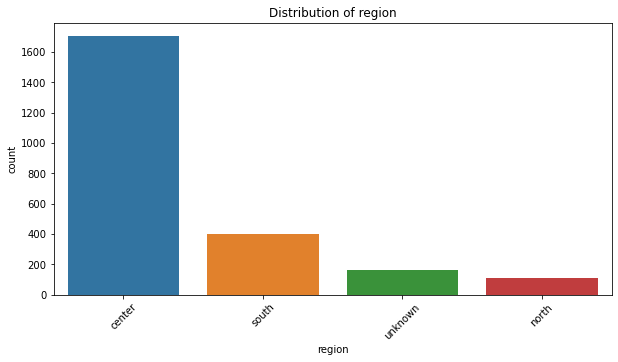

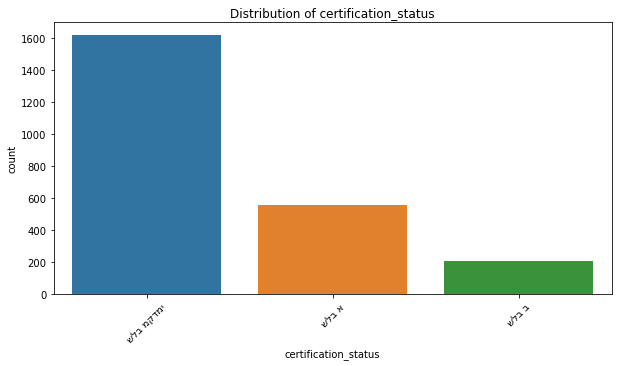

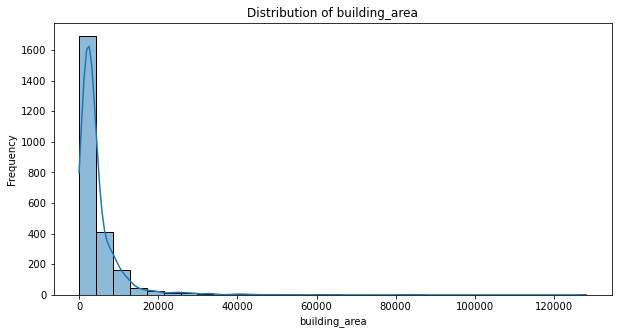

In [128]:
#משמעות הקטגוריות:
#region: מייצגת את האזור בארץ שבו נמצאים הנתונים. ניתוח התפלגות האזורים יכול להראות, למשל, אם הנתונים מוטים לאזור מסוים (למשל, אם רוב הדאטה הוא ממרכז הארץ).
#certification_status: מציינת את סטטוס ההסמכה של בניינים. בדיקת ההתפלגות יכולה להראות כמה בניינים עומדים בתקן ירוק, כמה בתהליך, וכמה עדיין לא מוסמכים.:

#תכונות קטגוריאליות חשוב לבדוק אם יש קטגוריה דומיננטית שמובילה את הנתונים או אם קיימת התפלגות שווה בין הקטגוריות
#למשל, אם נראה ש"רוב הבניינים בדרום אינם מוסמכים", זו תובנה חשובה למחקר

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# A. Categorical Features Visualization
categorical_columns = ['region', 'certification_status']
for col in categorical_columns:
    if col in data.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

# B. Numerical Features Visualization
numerical_columns = ['building_area']  # Adjusted to expected columns
for col in numerical_columns:
    if col in data.columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


In [127]:
# Detecting Outliers in numerical columns
outlier_columns = ['building_area', 'density']  # Adjusted to expected columns
outliers_summary = {}

for col in outlier_columns:
    if col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = max(Q1 - 1.5 * IQR, 0)
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_summary[col] = {
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Number of Outliers": len(outliers)
        }

# Display outlier summary
outliers_summary_df = pd.DataFrame(outliers_summary).T
print(outliers_summary_df)

               Lower Bound  Upper Bound  Number of Outliers
building_area      0.00000  9250.000000               232.0
density          120.55668   127.665992               715.0


In [ ]:
# יש לנו פה ערכים חריגים אבל הם אפשריים מכיוון שמדובר על שטח וכאלה אז בינתיים נשאיר אותם ונראה בהמשך כבר מה נעשה איתם
#צריך לזכור לגשת לפה כי אולי בהמשך הם ישפיעו לא טוב על המודלים שלנו

מחיקת שורות עם ערכים חסרים בפונקציית המטרה

In [126]:
# מחיקת שורות עם ערכים חסרים בעמודת המטרה בעדכון ה-DataFrame המקורי
target_column = 'certificate_energy_pre'

# בדיקה אם העמודה קיימת בנתונים
if target_column in data.columns:
    # מחיקת שורות עם ערכים חסרים
    data.dropna(subset=[target_column], inplace=True)
    print(f"Number of rows after removing missing values in '{target_column}': {data.shape[0]}")
else:
    print(f"Target column '{target_column}' not found in the dataset.")


Number of rows after removing missing values in 'certificate_energy_pre': 2383


פיצול בלי SMOTE

In [115]:
from sklearn.model_selection import train_test_split

# עמודת המטרה
target_column = 'certificate_energy_pre'

# הפרדת עמודת המטרה מהמאפיינים
if target_column in data.columns:
    X = data.drop(columns=[target_column])  # כל העמודות פרט לעמודת המטרה
    y = data[target_column]  # עמודת המטרה

    # פיצול הנתונים לסט אימון וסט בדיקה
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ווידוא הפיצול
    print("Shapes of the datasets:")
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
else:
    print(f"Target column '{target_column}' not found in the dataset. Please verify the column name.")


Shapes of the datasets:
X_train: (1906, 38), X_test: (477, 38)
y_train: (1906,), y_test: (477,)


פיצול עם SMOTE

In [133]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# עמודת המטרה
target_column = 'certificate_energy_pre'

# הפרדת עמודת המטרה מהמאפיינים
if target_column in data.columns:
    X = data.drop(columns=[target_column])  # כל העמודות פרט לעמודת המטרה
    y = data[target_column]  # עמודת המטרה

    # פיצול הנתונים לסט אימון וסט בדיקה
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # הדפסת מבנה הנתונים לפני איזון
    print("Shapes of the datasets before SMOTE:")
    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
    print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

    # מילוי ערכים חסרים
    # עמודות מספריות
    numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
    numeric_imputer = SimpleImputer(strategy='median')
    X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
    X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

    # עמודות קטגוריאליות
    categorical_columns = X_train.select_dtypes(include=['object']).columns
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_columns] = categorical_imputer.fit_transform(X_train[categorical_columns])
    X_test[categorical_columns] = categorical_imputer.transform(X_test[categorical_columns])

    # המרת עמודות קטגוריאליות לייצוג מספרי
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        # טיפול בערכים חדשים ב-X_test
        X_test[col] = X_test[col].astype(str).map(
            lambda x: le.transform([x])[0] if x in le.classes_ else -1
        )
        label_encoders[col] = le

    print("Missing values have been imputed and categorical columns encoded.")

    # איזון נתוני האימון באמצעות SMOTE
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

    # הדפסת מבנה הנתונים לאחר איזון
    print("\nShapes of the datasets after SMOTE:")
    print(f"X_train_balanced: {X_train_balanced.shape}")
    print(f"y_train_balanced: {y_train_balanced.shape}")

    # הדפסת התפלגות המטרות לאחר איזון
    print("\nDistribution of target after SMOTE:")
    print(Counter(y_train_balanced))
else:
    print(f"Target column '{target_column}' not found in the dataset.")


Shapes of the datasets before SMOTE:
X_train: (1906, 38), X_test: (477, 38)
y_train: (1906,), y_test: (477,)
Missing values have been imputed and categorical columns encoded.

Shapes of the datasets after SMOTE:
X_train_balanced: (4412, 38)
y_train_balanced: (4412,)

Distribution of target after SMOTE:
Counter({'B': 1103, 'C': 1103, 'A': 1103, 'A+': 1103})


Logistic Regression Model

In [134]:
# זיהוי עמודות שאינן מספריות
non_numeric_columns = X_train.select_dtypes(include=['object']).columns

# ניקוי נתונים
for col in non_numeric_columns:
    # ניקוי רווחים מיותרים והסרת תווים מיוחדים
    X_train[col] = X_train[col].astype(str).str.replace(r'\s+', '', regex=True).str.replace(',', '').astype(float, errors='ignore')
    X_test[col] = X_test[col].astype(str).str.replace(r'\s+', '', regex=True).str.replace(',', '').astype(float, errors='ignore')

# ווידוא שכל העמודות מספריות
X_train = X_train.apply(pd.to_numeric, errors='coerce').fillna(0)
X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0)

print("Data cleaning completed successfully.")


Data cleaning completed successfully.


אופציה לפני SMOTE

In [117]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# המרת עמודת המטרה לערכים מספריים
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train)
y_test_encoded = target_encoder.transform(y_test)

# סקלת נתונים (ל-SVM ו-kNN דורשים סקלה טובה יותר)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# רשימת המודלים
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(probability=True, random_state=42),
    "kNN": KNeighborsClassifier(n_neighbors=5)
}

# תוצאות המודלים
results = {}

# הרצת כל המודלים
for name, model in models.items():
    print(f"Training {name}...")
    
    # מודלים עם סקלת נתונים
    if name in ["SVM", "kNN"]:
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)
    
    # הערכת ביצועים עם התוויות המקודדות
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # המרה לערכים המקוריים לצורך הדוח (אופציונלי)
    y_pred_original = target_encoder.inverse_transform(y_pred.astype(int))
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_original, zero_division=0))
    
    # שמירת התוצאות
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1}

# תוצאות סופיות
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.2f}, Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1_score']:.2f}")


Training Decision Tree...

Decision Tree Performance:
Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-Score: 0.80

Classification Report:
              precision    recall  f1-score   support

           A       0.72      0.58      0.64        48
          A+       0.00      0.00      0.00         1
           B       0.84      0.85      0.85       285
           C       0.75      0.77      0.76       143

    accuracy                           0.80       477
   macro avg       0.58      0.55      0.56       477
weighted avg       0.80      0.80      0.80       477

Training Random Forest...

Random Forest Performance:
Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.42      0.59        48
          A+       0.00      0.00      0.00         1
           B       0.83      0.93      0.88       285
           C       0.81      0.78      0.79       143

    accuracy       

C:\Users\eliya\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [09:48:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.84
Precision: 0.85
Recall: 0.84
F1-Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           A       0.93      0.54      0.68        48
          A+       0.00      0.00      0.00         1
           B       0.85      0.93      0.89       285
           C       0.81      0.79      0.80       143

    accuracy                           0.84       477
   macro avg       0.65      0.56      0.59       477
weighted avg       0.85      0.84      0.84       477

Training SVM...

SVM Performance:
Accuracy: 0.67
Precision: 0.66
Recall: 0.67
F1-Score: 0.62

Classification Report:
              precision    recall  f1-score   support

           A       0.67      0.04      0.08        48
          A+       0.00      0.00      0.00         1
           B       0.67      0.91      0.77       285
           C       0.66      0.40      0.50       143

    accuracy                           0.67       477
   macro avg     

אופציה אחרי SMOTE

In [139]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# המרת עמודת המטרה לערכים מספריים
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train_balanced)  # שימוש בנתונים המאוזנים
y_test_encoded = target_encoder.transform(y_test)

# סקלת נתונים (ל-SVM ו-kNN דורשים סקלה טובה יותר)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # שימוש בנתונים המאוזנים
X_test_scaled = scaler.transform(X_test)

# רשימת המודלים
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(probability=True, random_state=42)
}

# תוצאות המודלים
results = {}

# הרצת כל המודלים
for name, model in models.items():
    print(f"Training {name}...")
    
    # מודלים עם סקלת נתונים
    if name in ["SVM", "kNN"]:
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_balanced, y_train_encoded)  # שימוש בנתונים המאוזנים
        y_pred = model.predict(X_test)
    
    # הערכת ביצועים עם התוויות המקודדות
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # המרה לערכים המקוריים לצורך הדוח (אופציונלי)
    y_pred_original = target_encoder.inverse_transform(y_pred.astype(int))
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_original, zero_division=0))
    
    # שמירת התוצאות
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1}

# תוצאות סופיות
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.2f}, Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1_score']:.2f}")



Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: 0.939946019933077

Tuning XGBoost...


C:\Users\eliya\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 200}
Best score for XGBoost: 0.9354131837710546
Training Decision Tree...

Decision Tree Performance:
Accuracy: 0.77
Precision: 0.78
Recall: 0.77
F1-Score: 0.77

Classification Report:
              precision    recall  f1-score   support

           A       0.54      0.56      0.55        48
          A+       0.00      0.00      0.00         1
           B       0.86      0.79      0.82       285
           C       0.69      0.80      0.74       143

    accuracy                           0.77       477
   macro avg       0.52      0.54      0.53       477
weighted avg       0.78      0.77      0.77       477

Training Random Forest...

Random Forest Performance:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           A       0.88      0.48      0.62        48
          A+       0.00      0.00      0.00       

C:\Users\eliya\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           A       0.96      0.46      0.62        48
          A+       0.00      0.00      0.00         1
           B       0.84      0.91      0.87       285
           C       0.75      0.76      0.75       143

    accuracy                           0.82       477
   macro avg       0.64      0.53      0.56       477
weighted avg       0.82      0.82      0.81       477

Training SVM...

SVM Performance:
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-Score: 0.71

Classification Report:
              precision    recall  f1-score   support

           A       0.42      0.42      0.42        48
          A+       0.00      0.00      0.00         1
           B       0.79      0.78      0.79       285
           C       0.64      0.67      0.66       143

    accuracy                           0.71       477
   macro avg     

אופציה נוספת עם GRID- ארוך

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# המרת עמודת המטרה לערכים מספריים
target_encoder = LabelEncoder()
y_train_encoded = target_encoder.fit_transform(y_train_balanced)  # שימוש בנתונים המאוזנים
y_test_encoded = target_encoder.transform(y_test)

# סקלת נתונים (ל-SVM ו-kNN דורשים סקלה טובה יותר)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)  # שימוש בנתונים המאוזנים
X_test_scaled = scaler.transform(X_test)

# כיוונון פרמטרים ל-Random Forest
print("\nTuning Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_balanced, y_train_encoded)
best_rf = grid_rf.best_estimator_

# תוצאות כיוונון Random Forest
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best score for Random Forest:", grid_rf.best_score_)

# כיוונון פרמטרים ל-XGBoost
print("\nTuning XGBoost...")
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                        param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_balanced, y_train_encoded)
best_xgb = grid_xgb.best_estimator_

# תוצאות כיוונון XGBoost
print("Best parameters for XGBoost:", grid_xgb.best_params_)
print("Best score for XGBoost:", grid_xgb.best_score_)

# רשימת המודלים
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": best_rf,  # שימוש במודל המכוונן
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": best_xgb,  # שימוש במודל המכוונן
    "SVM": SVC(probability=True, random_state=42)
}

# תוצאות המודלים
results = {}

# הרצת כל המודלים
for name, model in models.items():
    print(f"Training {name}...")
    
    # מודלים עם סקלת נתונים
    if name in ["SVM", "kNN"]:
        model.fit(X_train_scaled, y_train_encoded)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_balanced, y_train_encoded)  # שימוש בנתונים המאוזנים
        y_pred = model.predict(X_test)
    
    # הערכת ביצועים עם התוויות המקודדות
    accuracy = accuracy_score(y_test_encoded, y_pred)
    precision = precision_score(y_test_encoded, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test_encoded, y_pred, average='weighted')
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    
    # המרה לערכים המקוריים לצורך הדוח (אופציונלי)
    y_pred_original = target_encoder.inverse_transform(y_pred.astype(int))
    
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_original, zero_division=0))
    
    # שמירת התוצאות
    results[name] = {"accuracy": accuracy, "precision": precision, "recall": recall, "f1_score": f1}

# תוצאות סופיות
print("\nSummary of Results:")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.2f}, Precision={metrics['precision']:.2f}, Recall={metrics['recall']:.2f}, F1-Score={metrics['f1_score']:.2f}")
